In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", font="Times New Roman")

In [5]:
whatsapp = pd.read_csv("whatsapp_latency.csv")
whatsapp["app"] = "whatsapp"
keepass = pd.read_csv("keepass_latency.csv")
keepass["app"] = "keepass"

data = pd.concat([whatsapp, keepass])
data

,n,m,dist,trial,normal_compress,normal_compress_cpu,normal_decompress,normal_decompress_cpu,safe_partition,safe_partition_cpu,safe_compress,safe_compress_cpu,safe_decompress,safe_decompress_cpu,baseline_cpu,app
0,100,10000,even,0,0.095936,11.8,0.003936,0.0,0.090206,0.0,0.059516,0.0,0.023428,11.8,16.5,whatsapp
1,100,10000,even,1,0.053010,14.6,0.003598,0.0,0.090675,0.0,0.056584,0.0,0.022819,11.1,11.7,whatsapp
2,100,10000,even,2,0.052772,18.6,0.003585,0.0,0.090774,15.3,0.056227,0.0,0.022785,15.8,10.6,whatsapp
3,100,10000,even,3,0.055007,11.1,0.003528,0.0,0.090951,12.7,0.056488,0.0,0.022788,11.8,13.2,whatsapp
4,100,10000,even,4,0.052186,11.9,0.003537,0.0,0.090822,12.5,0.056289,0.0,0.022795,11.8,9.9,whatsapp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,10,1200,even,5,0.013395,9.1,0.000861,0.0,0.527345,13.0,0.018448,0.0,0.008194,0.0,1.7,keepass
46,10,1200,even,6,0.013776,8.3,0.000884,0.0,0.526259,13.5,0.018539,0.0,0.008242,0.0,1.6,keepass
47,10,1200,even,7,0.013560,0.0,0.000861,0.0,0.526413,13.8,0.018511,0.0,0.008217,0.0,1.5,keepass
48,10,1200,even,8,0.013392,0.0,0.000848,0.0,0.525460,13.6,0.018565,0.0,0.008154,0.0,1.5,keepass


In [21]:
wa_plot = data[(data.app == "whatsapp") & (data.m == 200000)]

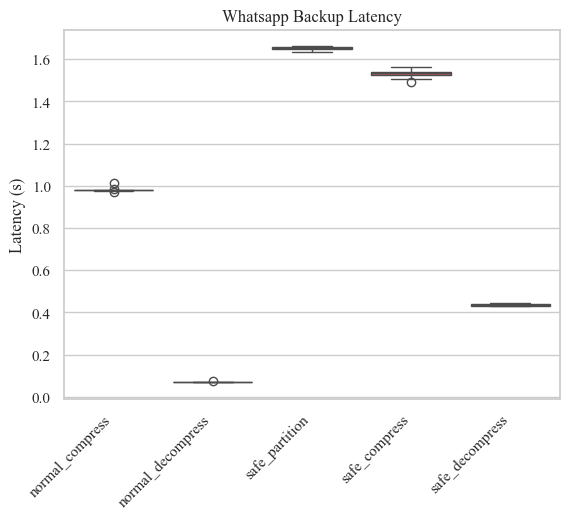

In [38]:
a = wa_plot[["normal_compress", "normal_decompress", "safe_partition", "safe_compress", "safe_decompress"]]
sns.boxplot(a)
plt.ylabel("Latency (s)")
plt.xticks(rotation=45, ha='right')
plt.title("Whatsapp Backup Latency")
plt.savefig("whatsapp_latency.png", bbox_inches='tight')

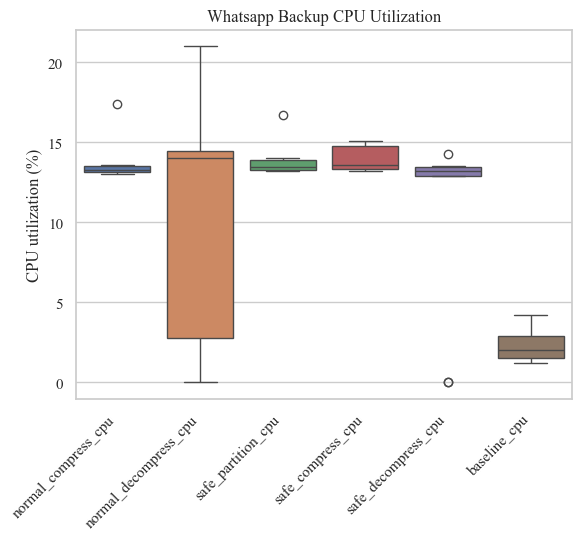

In [39]:
b = wa_plot[["normal_compress_cpu", "normal_decompress_cpu", "safe_partition_cpu", "safe_compress_cpu", "safe_decompress_cpu", "baseline_cpu"]]
sns.boxplot(b)
plt.ylabel("CPU utilization (%)")
plt.xticks(rotation=45, ha='right')
plt.title("Whatsapp Backup CPU Utilization")
plt.savefig("whatsapp_cpu.png", bbox_inches='tight')

In [32]:
kp_plot = data[(data.app == "keepass") & (data.m == 200)]


Text(0.5, 1.0, 'Keepass Backup Latency')

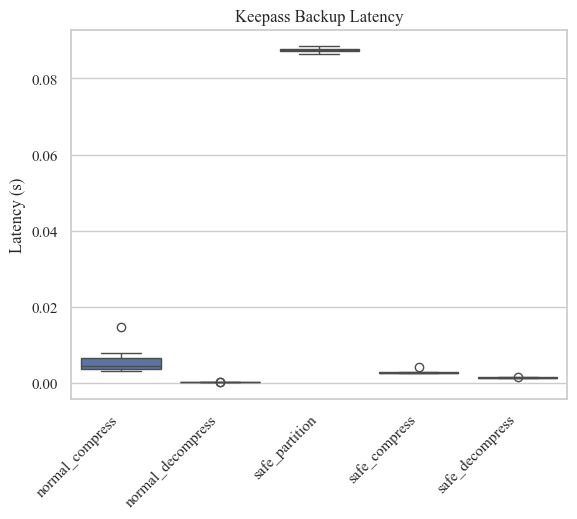

In [33]:
c = kp_plot[["normal_compress", "normal_decompress", "safe_partition", "safe_compress", "safe_decompress"]]
sns.boxplot(c)
plt.ylabel("Latency (s)")
plt.xticks(rotation=45, ha='right')
plt.title("Keepass Backup Latency")

Text(0.5, 1.0, 'Keepass CPU Utilization')

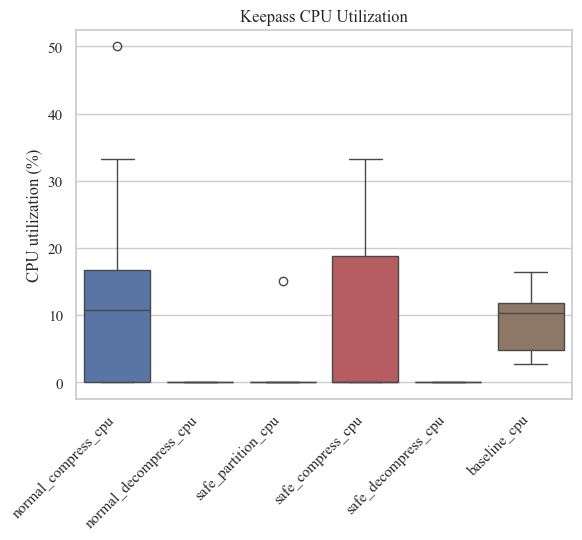

In [35]:
d = kp_plot[["normal_compress_cpu", "normal_decompress_cpu", "safe_partition_cpu", "safe_compress_cpu", "safe_decompress_cpu", "baseline_cpu"]]
sns.boxplot(d)
plt.ylabel("CPU utilization (%)")
plt.xticks(rotation=45, ha='right')
plt.title("Keepass CPU Utilization")